In [2]:
# importing libraries

import pandas as pd
import numpy as np
print('Done')

Done


In [3]:
# reading data
df = pd.read_csv('Q1_Dataset.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Checking Null values

In [4]:
# check all kinds of null values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
# No null values were found, however '?' is the null in this dataset

# replacing '?' with NaN
df.replace('?', np.nan, inplace=True)

# checking null values
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

## Imputing Missing values

In [6]:
# since all columns with null values are categorical, we will replace them with mode
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## Dropping Unnecessary columns

### Convering categorical to numerical (necessary)

In [7]:
# Firstly we will neeed to encode all categorical values in order to check correlation

# converting categorical using cat.codes
for col in df.columns:
    if col not in ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']:
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,6,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,8,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,11,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,9,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,9,4,9,3,4,0,0,0,30,38,0


Correlation analysis

<AxesSubplot: >

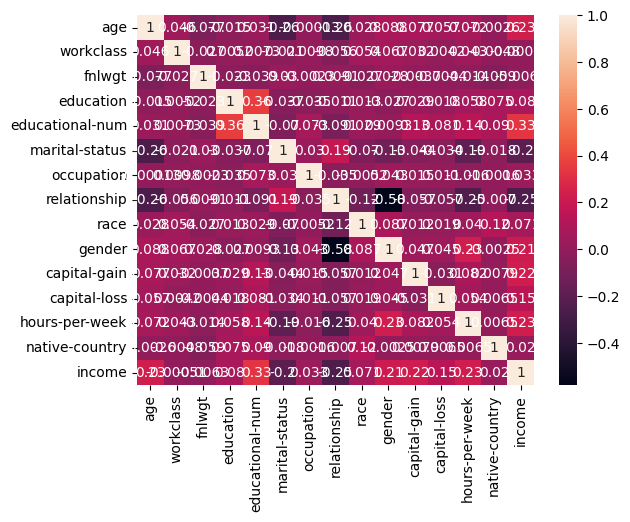

In [8]:
import seaborn as sns

# heatmap
sns.heatmap(df.corr(), annot=True)

Judging by the heatmap of correlation, there adr no attributes that are highly correlated with each other. Hence, we can conclude that there is no multicollinearity in the dataset.

## Normalizing Dataset

In [9]:
# using min max scaler to scale the data

for col in df.columns:
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.109589,0.428571,0.145129,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959,0.95,0.0
1,0.287671,0.428571,0.052451,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000,0.95,0.0
2,0.150685,0.142857,0.219649,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95,1.0
3,0.369863,0.428571,0.100153,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.076881,0.0,0.397959,0.95,1.0
4,0.013699,0.428571,0.061708,1.000000,0.600000,0.666667,0.692308,0.6,1.0,0.0,0.000000,0.0,0.295918,0.95,0.0


## Classification

### Apllying SVM

In [10]:
# splitting data into train and test

# finding the index of 80% of data
index = int(0.8 * len(df))

# splitting data into train and test
train = df[:index]
test = df[index:]

x_train = train.drop('income', axis=1)
y_train = train['income']

x_test = test.drop('income', axis=1)
y_test = test['income']

In [11]:
# Applying SVM model

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# creating model
model = SVC()

# fitting model
model.fit(x_train, y_train)

# predicting values
y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred)

0.8474767120483161

In [12]:
# hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# defining parameters
param_grid = {'C': [0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# fitting model
grid.fit(x_train, y_train)

# best parameters
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.825 total time=  17.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.833 total time=  17.3s


KeyboardInterrupt: 

## Evaluation Metrics

<AxesSubplot: >

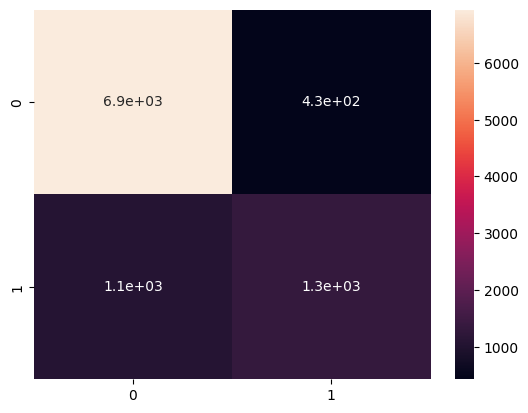

In [13]:
# Creating a confusion matrix

from sklearn.metrics import confusion_matrix

temp = confusion_matrix(y_test, y_pred)

# plotting confusion matrix
sns.heatmap(temp, annot=True)

In [14]:
# Accuracy
accuracy = (temp[0][0] + temp[1][1]) / (temp[0][0] + temp[0][1] + temp[1][0] + temp[1][1])
print('Accuracy: ', accuracy)

# Precision
precision = temp[1][1] / (temp[0][1] + temp[1][1])
print('Precision: ', precision)

# Recall
recall = temp[1][1] / (temp[1][0] + temp[1][1])
print('Recall: ', recall)

# F1 Score
f1_score = 2 * precision * recall / (precision + recall)
print('F1 Score: ', f1_score)

# Specificity
specificity = temp[0][0] / (temp[0][0] + temp[0][1])
print('Specificity: ', specificity)

# Sensitivity
sensitivity = temp[1][1] / (temp[1][0] + temp[1][1])
print('Sensitivity: ', sensitivity)

Accuracy:  0.8474767120483161
Precision:  0.7587768969422424
Recall:  0.5574043261231281
F1 Score:  0.6426858513189447
Specificity:  0.9421588594704684
Sensitivity:  0.5574043261231281


## ROC Curves

Accuracy Curve

In [ ]:
# plotting the accuracy curve for svm model for different values of C

import matplotlib.pyplot as plt

# defining values of C
c = [0.1, 1, 10, 100, 1000]

# defining empty list for accuracy
acc = []

# iterating over all values of C
for i in c:
    # creating model
    model = SVC(C=i)

    # fitting model
    model.fit(x_train, y_train)

    # predicting values
    y_pred = model.predict(x_test)

    # appending accuracy to acc
    acc.append(accuracy_score(y_test, y_pred))

# plotting the accuracy curve
plt.plot(c, acc)